# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [76]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:

import warnings
warnings.filterwarnings("ignore")


In [4]:
#Finding the shape of data

data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#from above data set it is observed that missing values in Age, cabin & embarked.

In [10]:
#Describing the dtaset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Finding survived count
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

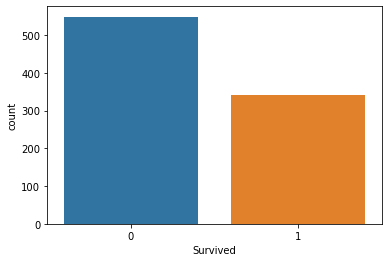

In [16]:
#Plotting the graph
sns.countplot(x=data["Survived"])


In [17]:
#from above data it is observed that 549 peoples are not survived, 342 nos are survived.

In [20]:
#finding classwise passengers travelled in titanic
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

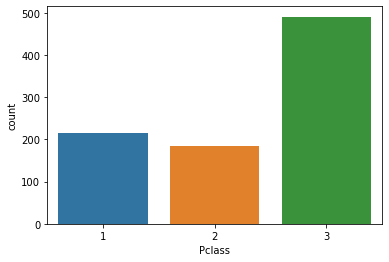

In [14]:
#Visualization of classwise passengers travelled in titanic
sns.countplot(data["Pclass"])

In [28]:
#Class 1:- 216 nos. passengers
#class 2:- 184 nos.
#class 3:- 491 nos. passengers are travelling.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

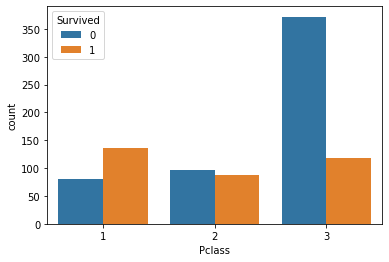

In [13]:
sns.countplot(data["Pclass"], hue=data["Survived"])

In [ ]:
#It observed very large no. Pclass :3 peoples are not survived with respect to other class.

In [29]:
# Visualising sex column
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

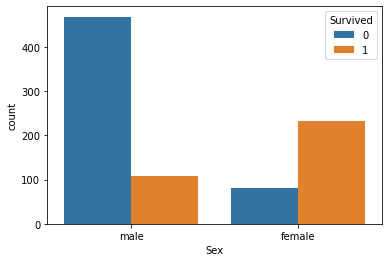

In [15]:
sns.countplot(data["Sex"], hue=data["Survived"])

In [16]:
#Large no. of male passengers are died in crisis. 
#More female passengers are survived as compared to male.

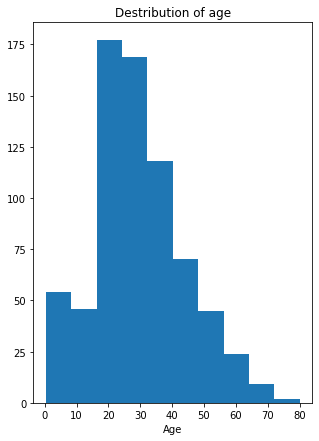

In [32]:
#Plotting the destribution of age 

plt.figure(figsize=(5,7))
plt.hist(data["Age"])
plt.title("Destribution of age")
plt.xlabel("Age")
plt.show()

In [33]:
#It is observed that higher nos. of pasengers are from age group 20 to 40 years. 
#There are very less nos. passengers who is from age group 70-80 Years 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

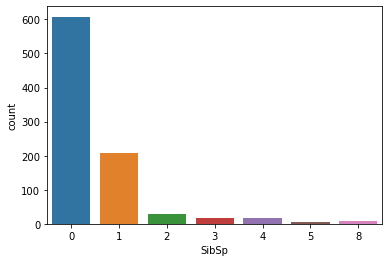

In [7]:
#Finding the no. of siblings
data["SibSp"].value_counts()
sns.countplot(data["SibSp"])

In [8]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
#Above data shows that around 608 nos. does not having sibling & very less nos. of 2 or more siblings.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

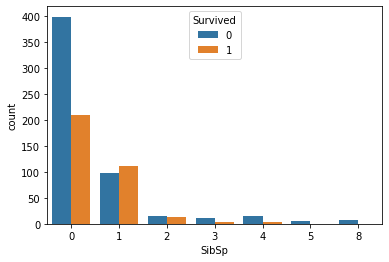

In [18]:
#Finding Survival of siblings
sns.countplot(data["SibSp"], hue= data["Survived"])

In [19]:
#though we observed earlier there are more no. of zeroo siblings are travelled hence more no. of zero siblings are  died.

In [ ]:
#Finding Survived 

In [35]:
#Finding the null values present in survived column
data["Survived"].isnull().sum()

0

In [36]:
#There is no null values are present in survived column

In [37]:
#Finding the null values present in age column
data["Age"].isna().sum()

177

In [24]:
#177 nos age group data is missing. Hence we will fill this null values with the help of mean values

In [80]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [81]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
#Dropping the features which does not contribute like PassengerID, Name, Ticket, Cabin, Parch, Sibsp
data.drop(["PassengerId","Name", "Ticket", "Cabin"],axis=1, inplace=True)

In [100]:
#New dataset is:


In [101]:
#Lets encode Sex column using label encoder technique
lab_enc= LabelEncoder()

df=lab_enc.fit_transform(data["Sex"])

#Fetching encoded dat into the main dataset

data["Sex"]=df

In [102]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [126]:
#finding of any null values before training of datset

data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [104]:
x=data.drop(columns=["Survived"])
y=data["Survived"]

In [105]:

from sklearn.preprocessing import StandardScaler 

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [129]:
#Model initialsation
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25)

In [128]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [108]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [117]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8026905829596412

In [119]:
#Finding the confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[120,  22],
       [ 22,  59]], dtype=int64)

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.73      0.73      0.73        81

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [120]:
#From above it is observed that our accuracy score is 80% & also having very good precision score & F1 score :- 79% each.

In [125]:
#Lets plot True positive rate & False positive rate

In [121]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [122]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.15492958 1.        ]
True Positive Rate [0.         0.72839506 1.        ]
Threshold [2 1 0]


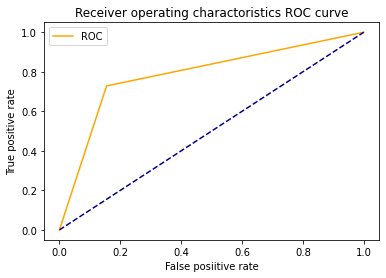

In [123]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [124]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7867327421318032


In [127]:
#AUC score is around 78%

In [130]:
#Model training using Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [149]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        print("===========Train Result=========\n")
        
        print(f"Accuracy score: {accuracy_score(y_train, y_pred)*100: .2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("==========Test Result============\n")
        
        print(f"accuracy score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        
        print(f"\n classification report \n", classification_report(y_test, pred, digits=2))
        
        

In [150]:
#Model initiation

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [151]:
# call the function & pass dataset to check training score & testing score

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # Training score

metric_score(clf, x_train, x_test, y_train, y_test, train=False)   # Testing score

===========Train Result=========

Accuracy score:  97.90%
==========Test Result============

accuracy score: 80.72%

 classification report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       147
           1       0.71      0.72      0.72        76

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [152]:
#By the use of decision tree classifier we got very good Training Accuracy score:-97.90%
#Testing score:- 80.72%.
#Precision score & F1 score:- 79% each.

In [153]:
#By using two model we got same accuracy score, precision score & F2 score.

# Now we can predict an arbitrary passenger on Titanic would survive the sinking or not.

In [154]:
data.tail(2)

,Survived,Pclass,Sex,Age,Fare
889,1,1,1,26.0,30.00
890,0,3,1,32.0,7.75


In [156]:
print("Prd :  ", log_reg.predict(scalar.transform([[3,1,32,7.75]])))

Prd :   [0]


In [158]:
#From abive model we have successfully predicted whether the passenger is survived or not.
print("Prd :  ", log_reg.predict(scalar.transform([[1,1,26,30]])))

Prd :   [1]
